In [1]:
import os
os.chdir("../")

In [2]:
import os 
from pathlib import Path
from dataclasses import dataclass
import torchvision.datasets as datasets
import torch
from src.vision_Transformer.utils.common import read_yaml , create_directories
from src.vision_Transformer.constants import *

In [3]:
@dataclass(frozen = True)
class DataValidationConfig:
    root_dir: Path
    data_set_dir : Path
    STATUS_FILE : str

In [4]:
class ConfigurationManager:
    def __init__(self , config_file_path = CONFIG_FILE_PATH , params_file_path = PARAMS_FILE_PATH):
        self.config = read_yaml(config_file_path)
        self.params = read_yaml(params_file_path)

        create_directories([self.config.artifacts_root])


    def get_data_validation_config(self) -> DataValidationConfig:

        config = self.config.data_validation

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig(
            root_dir= config.root_dir,
            STATUS_FILE= config.STATUS_FILE,
            data_set_dir = config.data_set_dir
        )

        return data_validation_config

In [5]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from src.vision_Transformer.logging import logger
import matplotlib.pyplot as plt

pre_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5) , std = (0.5))
])

In [12]:
import numpy as np

In [ ]:
class DataValidation:
    def __init__(self, config  : DataValidationConfig , pre_transform):
        self.config = config
        self.pre_transform = pre_transform

    def validate_data(self):

        train_dataset = datasets.CIFAR10(
            root= self.config.data_set_dir,
            train = True,
            download = False,
            transform = self.pre_transform,
        )

        test_dataset = datasets.CIFAR10(
            root= self.config.data_set_dir,
            train = False,
            download = False,
            transform = self.pre_transform,
        )

        return train_dataset , test_dataset

    

    def check_size(self, train_dataset , test_dataset) -> bool:
        is_valid = True
        len_of_train_dataset = len(train_dataset)
        len_of_test_dataset = len(test_dataset)

        len_of_classes_train_dataset = len(train_dataset.classes)

        if len_of_train_dataset == 50000 and len_of_test_dataset == 10000:
            logger.info(f"The length of both train and test dataset is correct")
        
        if len_of_classes_train_dataset == 10:
            logger.info(f"The number of both train and test dataset's classes is correct")
        
        else:
            logger.info(f"Original Dataset's details does not match the downloaded Datasets's details")
            is_valid = False

        return is_valid

    def plot_image(self, dataset , classes , num_of_images = 5):
        fig , axes = plt.subplots(1 , num_of_images , figsize = (8 ,4))

        for i in range(num_of_images):
            image , label = dataset[i + np.random.randint(0,10)]

            image = image.permute(1, 2, 0).numpy()
            image = (image*0.5) + 0.5

            axes[i].imshow(image)
            axes[i].set_title(classes[label])
            axes[i].axis("off")
        plt.tight_layout()
        plt.show()

    # now validate status
    def write_status(self , is_valid):

        txt_file = self.config.STATUS_FILE

        is_valid = is_valid
        correct = ""
        if(is_valid):
            correct = "correct"
        else:
            correct = "is not correct"

        with open(txt_file, "w") as f:
            f.write(f"The Dataset is {correct}")

[2025-08-02 11:26:48,943 : INFO : common  : yaml file config\config.yaml was read succesfully]
[2025-08-02 11:26:48,944 : INFO : common  : yaml file params.yaml was read succesfully]
[2025-08-02 11:26:48,947 : INFO : common  : Created directory at : artifacts]
[2025-08-02 11:26:48,948 : INFO : common  : Created directory at : artifacts/data_validation]
[2025-08-02 11:26:49,952 : INFO : 2880463172  : The length of both train and test dataset is correct]
[2025-08-02 11:26:49,952 : INFO : 2880463172  : The number of both train and test dataset's classes is correct]
--------------------------------------


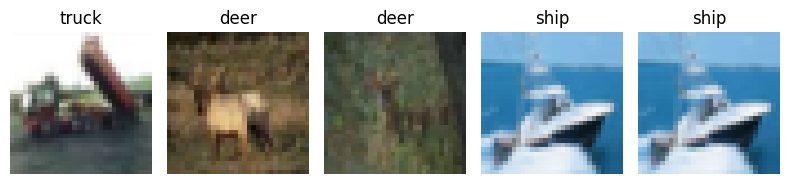

In [18]:
# try:
config = ConfigurationManager()
data_validation_config = config.get_data_validation_config()

data_validation = DataValidation(data_validation_config , pre_transform)

train_dataset , test_dataset = data_validation.validate_data()
is_valid = data_validation.check_size(train_dataset, test_dataset)

data_validation.write_status(is_valid)

print("--------------------------------------")
data_validation.plot_image(train_dataset , classes=train_dataset.classes)
# except Exception as e:
#   raise e